In [18]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import keras
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

import plotly.graph_objects as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def modified_z_score(data):
    median_int = np.median(data)
    mad_int = np.median([np.abs(data-median_int)])
    modified_z_score = 0.6745* (data - median_int) / mad_int
    return modified_z_score
def delta(data):
    delta_data = []
    for i in np.arange(len(data)-6):
        dist = data[i+6] - data[i]

        delta_data.append(dist)

    delta_int = np.array(delta_data)
    return delta_int
def fixer(y, m, threshold):
    spikes = abs(np.array(modified_z_score(delta(y)))) > threshold
    y_out = y.copy()

    for i in np.arange(len(spikes)):
        if spikes[i] != 0:
            w = np.arange(i-m, i+1+m)
            w2 = w[spikes[w] == 0]
            y_out[i] = np.mean(y[w2])
    return y_out

In [25]:
df = pd.read_csv(r'..\data\untouched_data\oli\2018\HPI884.csv', sep=';')

,Time,HPI884
0,13/03/2018 18:01:48,3.564
1,13/03/2018 20:01:40,3.561
2,13/03/2018 22:01:32,3.572
3,14/03/2018 00:01:24,3.572
4,14/03/2018 02:01:16,3.575


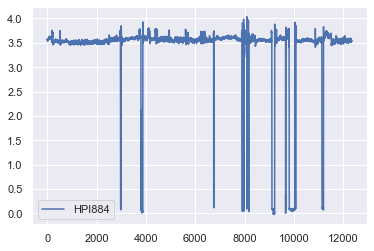

In [26]:
df.plot()
df.head()

In [30]:
fig = go.Figure()
fig.update_layout(autosize=False,width=900,height=500,margin=dict(l=10,r=10,b=10,t=10,pad=4))
fig.add_trace(go.Scatter(x=df.index, y=df["HPI884"]))
fig.show()

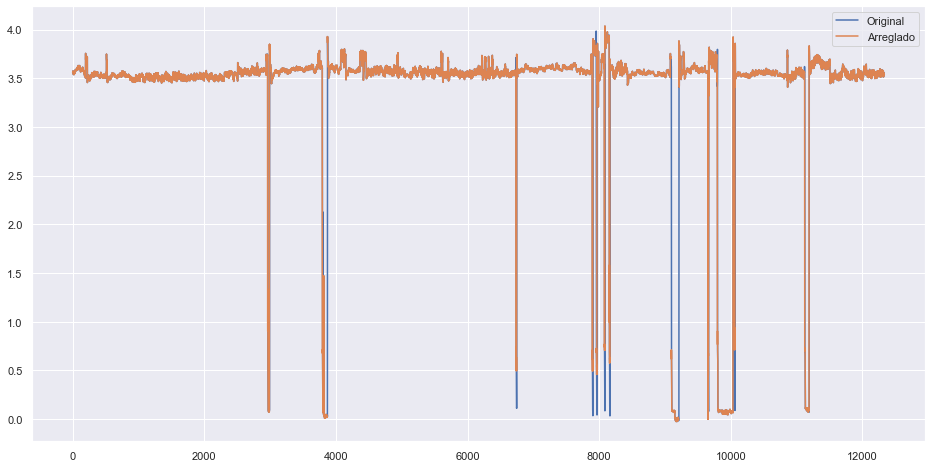

In [28]:
f,ax=plt.subplots(figsize=(16,8))
plt.plot(df['HPI884'], label="Original")
plt.plot(fixer(df['HPI884'], m=3, threshold=50), label="Arreglado")
plt.legend()
plt.show()